In [ ]:
!gdown 1IRQWbO9m-c93XjDsbtt2nqv5RVldVPzj

Downloading...
From: https://drive.google.com/uc?id=1IRQWbO9m-c93XjDsbtt2nqv5RVldVPzj
To: /content/Country-data.csv
100% 9.23k/9.23k [00:00<00:00, 30.9MB/s]


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("Country-data.csv")

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.shape

(167, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


**EDA Steps**

**Checking for MIssing values**




In [ ]:
df.isnull().sum().sum()

0

**Checking Duplicate Values**

In [ ]:
duplicates = df[df.duplicated()]

In [ ]:
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


Converting Exports, Imports and Health column into actual value

In [ ]:
df['export in dollar'] = (df['exports'] / 100) * df['gdpp']
df['import in dollar'] = (df['imports'] / 100) * df['gdpp']
df['health in dollar'] = (df['health'] / 100) * df['gdpp']

In [ ]:
df.drop(columns = ['exports', 'imports', 'health'], inplace = True)

**Normalizing the Dataset before Outlier detection**

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
df_noCountry = df.drop(columns=['country'])

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_noCountry)
df_scaled = pd.DataFrame(df_scaled, columns= df_noCountry.columns)

In [ ]:
df_scaled.insert(0, 'country', df["country"].values)

In [ ]:
df_scaled.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export in dollar,import in dollar,health in dollar
0,Afghanistan,1.291532,-0.808245,0.157336,-1.619092,1.902882,-0.679180,-0.411011,-0.432276,-0.565040
1,Albania,-0.538949,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,-0.350191,-0.313677,-0.439218
2,Algeria,-0.272833,-0.220844,0.789274,0.670423,-0.038404,-0.465376,-0.318526,-0.353720,-0.484826
3,Angola,2.007808,-0.585043,1.387054,-1.179234,2.128151,-0.516268,-0.291375,-0.345953,-0.532363
4,Antigua and Barbuda,-0.695634,0.101732,-0.601749,0.704258,-0.541946,-0.041817,-0.104331,0.040735,-0.178771


**Checking for Outliers**

In [ ]:
# Keep a copy of the Country column
country_names = df_scaled['country']


In [ ]:
# Drop the Country column
df_scaled_without_country = df_scaled.drop(columns=['country'])


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np


In [ ]:
for n in [5, 10, 15, 20]:
    lof = LocalOutlierFactor(n_neighbors=n, contamination=0.05)
    outlier_labels = lof.fit_predict(df_scaled_without_country)
    num_outliers = sum(outlier_labels == -1)
    print(f"n_neighbors={n}: Detected {num_outliers} outliers")

n_neighbors=5: Detected 9 outliers
n_neighbors=10: Detected 9 outliers
n_neighbors=15: Detected 9 outliers
n_neighbors=20: Detected 9 outliers


In [ ]:
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.05)
outlier_labels = lof.fit_predict(df_scaled_without_country)
lof_scores = lof.negative_outlier_factor_

df_scaled['LOF_Label'] = outlier_labels
df_scaled['LOF_Score'] = lof_scores

In [ ]:
df_scaled.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export in dollar,import in dollar,health in dollar,LOF_Label,LOF_Score
0,Afghanistan,1.291532,-0.808245,0.157336,-1.619092,1.902882,-0.679180,-0.411011,-0.432276,-0.565040,1,-0.999150
1,Albania,-0.538949,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,-0.350191,-0.313677,-0.439218,1,-0.945336
2,Algeria,-0.272833,-0.220844,0.789274,0.670423,-0.038404,-0.465376,-0.318526,-0.353720,-0.484826,1,-1.275210
3,Angola,2.007808,-0.585043,1.387054,-1.179234,2.128151,-0.516268,-0.291375,-0.345953,-0.532363,1,-1.227754
4,Antigua and Barbuda,-0.695634,0.101732,-0.601749,0.704258,-0.541946,-0.041817,-0.104331,0.040735,-0.178771,1,-0.997481


All datapoints classified as Outlier by LOF

In [ ]:
df_scaled[df_scaled["LOF_Label"] == -1]

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export in dollar,import in dollar,health in dollar,LOF_Label,LOF_Score
66,Haiti,4.221297,-0.813969,-0.221257,-4.337186,0.253120,-0.673215,-0.408445,-0.420002,-0.562909,-1,-2.758002
87,Lesotho,1.527804,-0.768184,-0.344609,-2.713097,0.233243,-0.645415,-0.388373,-0.368635,-0.516069,-1,-2.102619
91,Luxembourg,-0.882164,3.878996,-0.394898,1.211786,-0.873224,5.036507,9.839814,9.716681,3.954197,-1,-4.745354
98,Malta,-0.782681,0.580393,-0.374972,1.099002,-1.052114,0.445220,1.387410,1.766290,0.427847,-1,-2.221019
113,Nigeria,2.281385,-0.624065,9.129718,-1.134121,1.916133,-0.581936,-0.381202,-0.421563,-0.522605,-1,-4.082770
123,Qatar,-0.727966,5.611542,-0.076082,1.008775,-0.581700,3.137608,2.029927,0.691570,0.120098,-1,-2.550833
133,Singapore,-0.882164,2.859238,-0.742749,1.369684,-1.191250,1.840665,4.786798,5.079237,0.439100,-1,-2.977395
159,United States,-0.770246,1.678193,-0.622623,0.918548,-0.674457,1.939167,-0.079186,0.072194,4.235432,-1,-2.457228
163,Venezuela,-0.526514,-0.033542,3.616865,0.546361,-0.316678,0.029323,-0.199393,-0.287205,-0.219310,-1,-2.347810


As we can see that there are some countries which do not need help are outlier like US, Luxemborg, Qatar etc.

And there are some countries like Haiti, Lesotho and Nigeria which require help also part of outliers.

As we have only 167 datapoints, I am not going to remove any outlier as the extreme values are important in case of extremely poor countries

In [ ]:
df_scaled.columns

Index(['country', 'child_mort', 'income', 'inflation', 'life_expec',
       'total_fer', 'gdpp', 'export in dollar', 'import in dollar',
       'health in dollar', 'LOF_Label', 'LOF_Score'],
      dtype='object')

Winsorizing extreme datapoints to 5% and 95%

In [ ]:
from scipy.stats import mstats
df_scaled['child_mort'] = mstats.winsorize(df_scaled['child_mort'], limits=[0.05, 0.05])
df_scaled['income'] = mstats.winsorize(df_scaled['income'], limits=[0.05, 0.05])
df_scaled['inflation'] = mstats.winsorize(df_scaled['inflation'], limits=[0.05, 0.05])
df_scaled['gdpp'] = mstats.winsorize(df_scaled['gdpp'], limits=[0.05, 0.05])
df_scaled['export in dollar'] = mstats.winsorize(df_scaled['export in dollar'], limits=[0.05, 0.05])
df_scaled['import in dollar'] = mstats.winsorize(df_scaled['import in dollar'], limits=[0.05, 0.05])
df_scaled['health in dollar'] = mstats.winsorize(df_scaled['health in dollar'], limits=[0.05, 0.05])


In [ ]:
df_scaled.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,export in dollar,import in dollar,health in dollar,LOF_Label,LOF_Score
0,Afghanistan,1.291532,-0.808245,0.157336,-1.619092,1.902882,-0.679180,-0.410327,-0.432276,-0.565040,1,-0.999150
1,Albania,-0.538949,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,-0.350191,-0.313677,-0.439218,1,-0.945336
2,Algeria,-0.272833,-0.220844,0.789274,0.670423,-0.038404,-0.465376,-0.318526,-0.353720,-0.484826,1,-1.275210
3,Angola,1.933196,-0.585043,1.244725,-1.179234,2.128151,-0.516268,-0.291375,-0.345953,-0.532363,1,-1.227754
4,Antigua and Barbuda,-0.695634,0.101732,-0.601749,0.704258,-0.541946,-0.041817,-0.104331,0.040735,-0.178771,1,-0.997481


Univariante Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

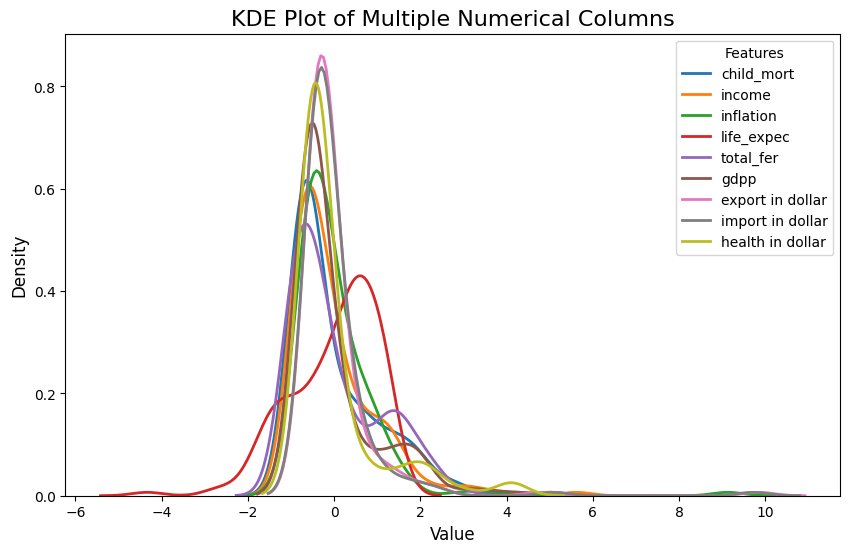

In [ ]:
plt.figure(figsize=(10, 6))
for column in df_scaled_without_country.columns:
    sns.kdeplot(df_scaled_without_country[column], label=column, linewidth=2)

plt.title("KDE Plot of Multiple Numerical Columns", fontsize=16)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Features", fontsize=10)
plt.show()

As checked there are multiple peaks in almost all the kdeplot for columns respectively, which suggest the presence of multiple clusters.

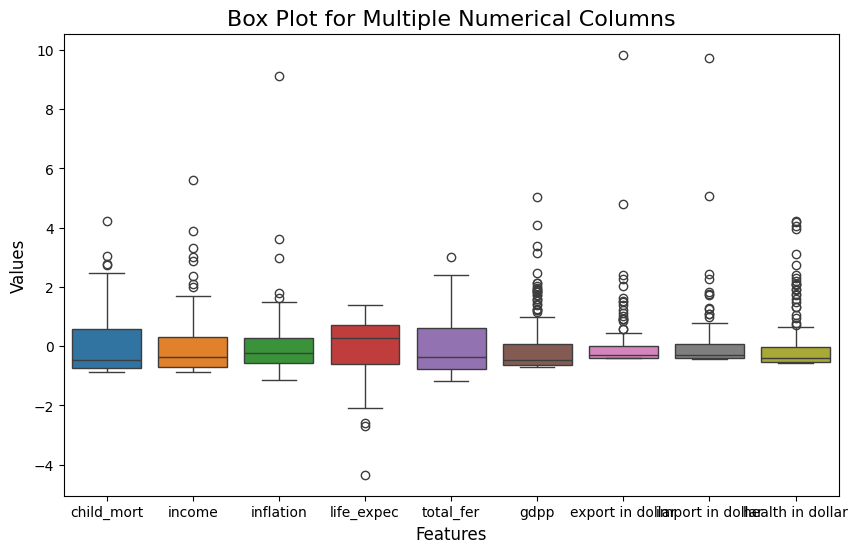

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data= df_scaled_without_country)
plt.title("Box Plot for Multiple Numerical Columns", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.show()

Bi-variante Visualisation

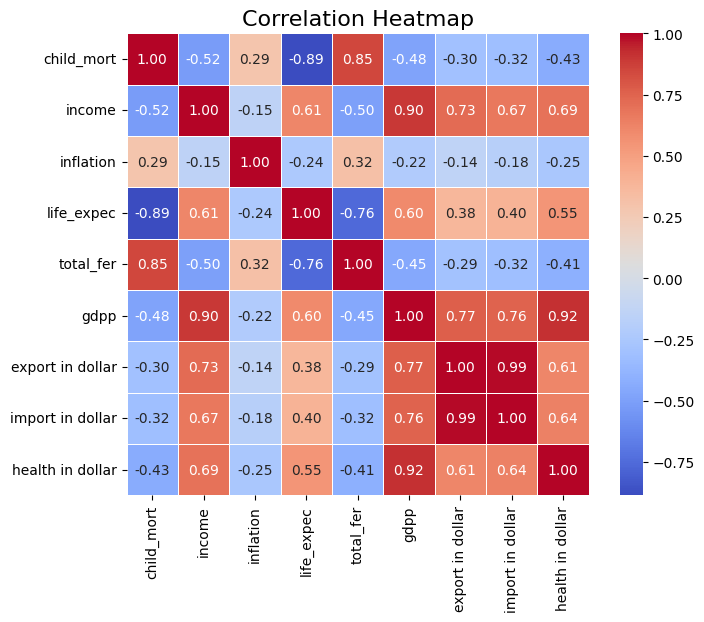

In [ ]:
correlation_matrix = df_scaled_without_country.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,            # Show correlation values
    cmap='coolwarm',       # Color map
    fmt='.2f',             # Format for values
    linewidths=0.5,        # Add lines between squares
    square=True            # Make each cell square-shaped
)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [ ]:
sns.pairplot(
    df_scaled,
    hue='country',
    diag_kind='kde',
    markers=['o', 's'],
    palette='Set2',
    height=4,
    aspect=1.2
)

plt.suptitle("Pairplot of Features", y=1.02, fontsize=16)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (167) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (167) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (167) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (167) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer value

Hypothesis Testing

Null Hypothesis : The mean life expectancy of the high-health Spent group is equal to the mean life expectancy of the low-health Spent group.

In [ ]:
import scipy.stats as stats

In [ ]:
df_scaled.columns

Index(['country', 'child_mort', 'income', 'inflation', 'life_expec',
       'total_fer', 'gdpp', 'export in dollar', 'import in dollar',
       'health in dollar', 'LOF_Label', 'LOF_Score'],
      dtype='object')

In [ ]:
np.mean(df["health in dollar"])

1056.7332041916168

In [ ]:
high_health = df[df['health in dollar'] > 1056.7332041916168]['life_expec']
low_health = df[df['health in dollar'] <= 1056.7332041916168]['life_expec']

In [ ]:
t_statistic, p_value = stats.ttest_ind(high_health, low_health)
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in life expectancy between high and low income groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in life expectancy between high and low income groups.")


T-statistic: 8.565502174164891
P-value: 7.281827115748667e-15
Reject the null hypothesis: There is a significant difference in life expectancy between high and low income groups.


Hypothesis:  There is no significant correlation between Total Fertility and Income per person.

In [ ]:
correlation, p_value = stats.pearsonr(df['total_fer'], df['income'])
print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant negative correlation between Total Fertility Rate and Income per Person.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between Total Fertility Rate and Income per Person.")

Correlation coefficient: -0.5018400532297552
P-value: 4.8858748799787085e-12
Reject the null hypothesis: There is a significant negative correlation between Total Fertility Rate and Income per Person.


Hypothesis: There is no significant correlation between income levels and child mortality rates.

In [ ]:
correlation, p_value = stats.pearsonr(df['child_mort'], df['income'])
print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant negative correlation between Child Mortality and Income per Person.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between Child Mortality and Income per Person.")

Correlation coefficient: -0.5243150164994348
P-value: 3.5388013816301654e-13
Reject the null hypothesis: There is a significant negative correlation between Child Mortality and Income per Person.


In [ ]:
np.mean(df["income"])

17144.688622754493

In [ ]:
high_income = df[df['income'] > 17144.68]['child_mort']
low_income = df[df['income'] <= 17144.68]['child_mort']

In [ ]:
t_statistic, p_value = stats.ttest_ind(high_income, low_income)
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in child mortality between high and low income groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in child mortality between high and low income groups.")

T-statistic: -7.845312435842376
P-value: 5.132812773281128e-13
Reject the null hypothesis: There is a significant difference in child mortality between high and low income groups.


Hypothesis: There is no significant correlation between inflation rates and GDP per capita.

In [ ]:
correlation, p_value = stats.pearsonr(df['inflation'], df['gdpp'])
print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant negative correlation between inflation and gdpp.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between inflation and gdpp.")

Correlation coefficient: -0.22163105810153869
P-value: 0.003995984320917072
Reject the null hypothesis: There is a significant negative correlation between inflation and gdpp.


In [ ]:
np.mean(df["inflation"])

7.781832335329342

In [ ]:
high_inflation = df[df['inflation'] > 7.78]['gdpp']
low_inflation = df[df['inflation'] <= 7.78]['gdpp']

In [ ]:
t_statistic, p_value = stats.ttest_ind(high_inflation, low_inflation)
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in gdpp between high and low inflation groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in gdpp between high and low inflation groups.")

T-statistic: -3.6046482447190393
P-value: 0.0004136190849274329
Reject the null hypothesis: There is a significant difference in gdpp between high and low inflation groups.


In [ ]:
df_scaled.to_csv('country_scaled.csv', index=False)